# Informe cuantitativo

usamos el screaner de finvist https://finviz.com/ encontrar las 6 companias con mayor capitalización bursatil en el mercado.

In [58]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
!pip install --upgrade pandas
import scipy.stats

In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import risk as r

In [ ]:
Descargar mar

In [24]:
# Acceso a precios historicos de multiples tickers 
prices = yf.download(tickers=['MSFT', 'AAPL', 'GOOG', 'AMZN', 'NVDA'],
                     interval='1mo',
                     start='2013-01-01',
                     end='2024-01-01')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [25]:
prices.head()

,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2013-01-01,13.894359,13.2750,18.821701,22.394157,2.829803
2013-02-01,13.464560,13.2135,19.955202,22.679699,2.922129
2013-03-01,13.581690,13.3245,19.780607,23.533751,2.979535
2013-04-01,13.585367,12.6905,20.537271,27.227093,3.197834
2013-05-01,13.798614,13.4600,21.699165,28.707726,3.360395


In [20]:
prices.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

In [26]:
prices.index.to_period('M')

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10',
             ...
             '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
             '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]', name='Date', length=132)

In [27]:
prices.columns

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA'], dtype='object')

In [28]:
prices.columns=['Apple','Amazon','Google','Microsoft','Nvidia']

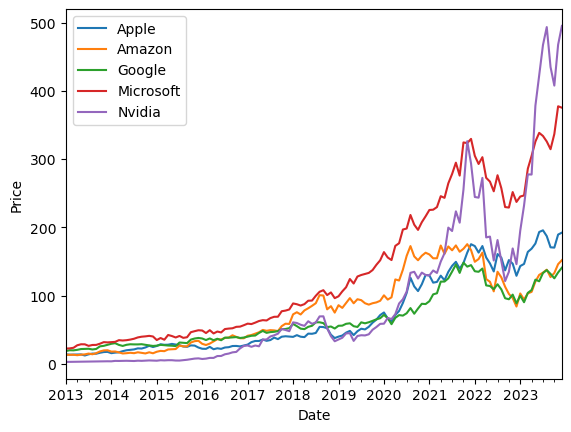

In [29]:
prices.plot.line()
plt.legend()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [30]:
rt=prices.pct_change().dropna()

In [31]:
er=r.annualized_return(rt,12)

In [32]:
vol_anualizada=r.annualized_volatility(rt,12)

<AxesSubplot:>

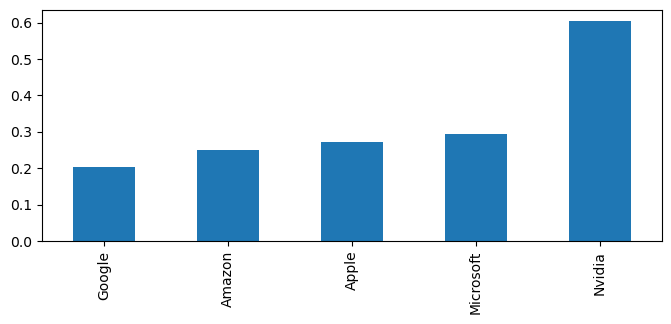

In [33]:
er.sort_values().plot.bar(figsize=(8, 3))

<AxesSubplot:>

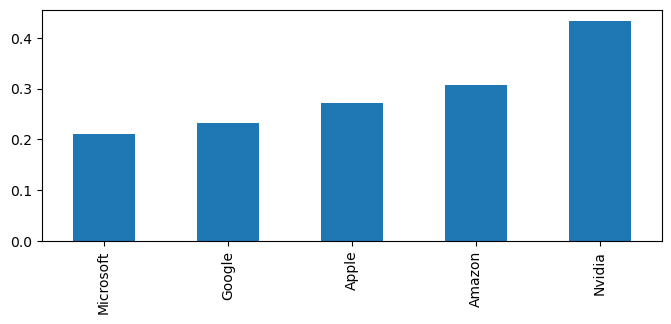

In [34]:
vol_anualizada.sort_values().plot.bar(figsize=(8, 3))

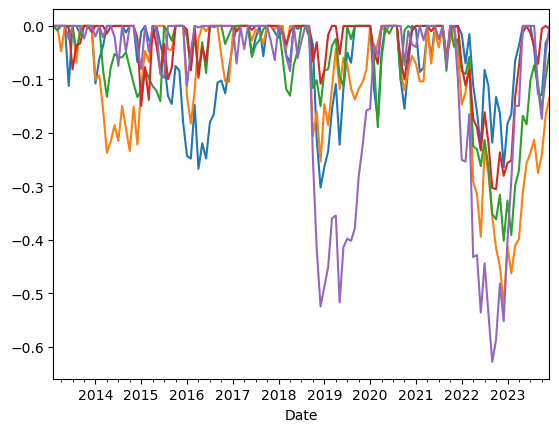

In [ ]:
for x in rt:
   r.drawdown(rt[x])['Drawdowns'].plot.line()

<AxesSubplot:>

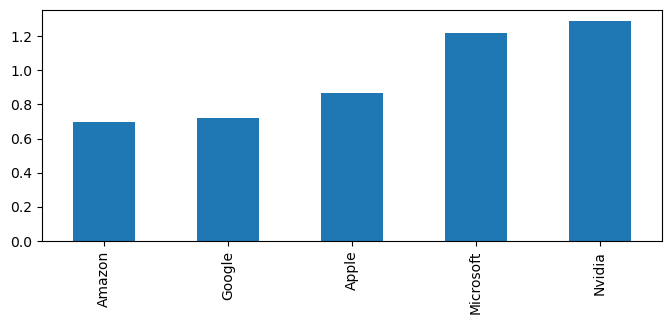

In [35]:
r.sharpe_ratio(rt,0.03,12).sort_values().plot.bar(figsize=(8,3))

<function matplotlib.pyplot.show(close=None, block=None)>

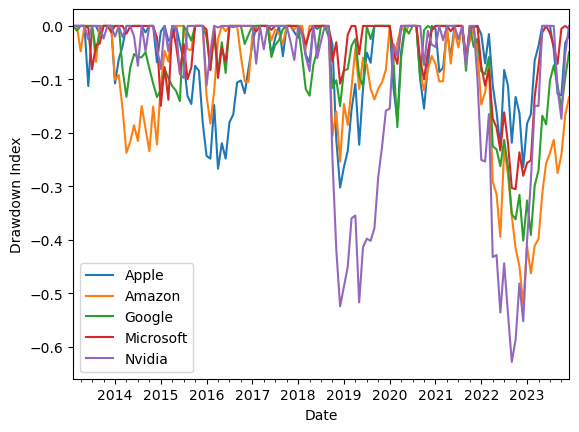

In [39]:
for ticker in rt:
    dd = r.drawdown(rt[ticker])['Drawdowns']
    dd.plot.line(label=ticker)
plt.xlabel('Date')
plt.ylabel('Drawdown Index')
plt.legend()
plt.show

In [40]:
# Dictionary to store results
drawdown_results = {}
for x in rt:
    dd = r.drawdown(rt[x])["Drawdowns"]
    max_drawdown = dd.min()
    index_drawdown = dd.idxmin()
    drawdown_results[x] = {'Max Drawdown': max_drawdown, 'Date of Max Drawdown': index_drawdown}

# Convert dictionary to DataFrame for table display
drawdown_table = pd.DataFrame(drawdown_results).T

# Print the table
print(drawdown_table)

          Max Drawdown Date of Max Drawdown
Apple        -0.302176  2018-12-01 00:00:00
Amazon       -0.520968  2022-12-01 00:00:00
Google       -0.401567  2022-12-01 00:00:00
Microsoft    -0.305285  2022-10-01 00:00:00
Nvidia       -0.628317  2022-09-01 00:00:00


In [43]:
result=pd.concat([rt.mean(),rt.std(), r.skewness(rt),r.kurtosis(rt), rt.aggregate(r.normal_test)],axis=1)
result.columns = ['Mean', 'Volatility', 'skewness','kurtosis', 'Normal Test']
result

,Mean,Volatility,skewness,kurtosis,Normal Test
Apple,0.023323,0.078958,-0.140690,2.557077,True
Amazon,0.022600,0.088878,0.265485,3.626023,True
Google,0.017710,0.067466,0.096672,3.268597,True
Microsoft,0.023559,0.061125,0.189606,3.334050,True
Nvidia,0.047866,0.125672,0.000371,3.551820,True


<AxesSubplot:>

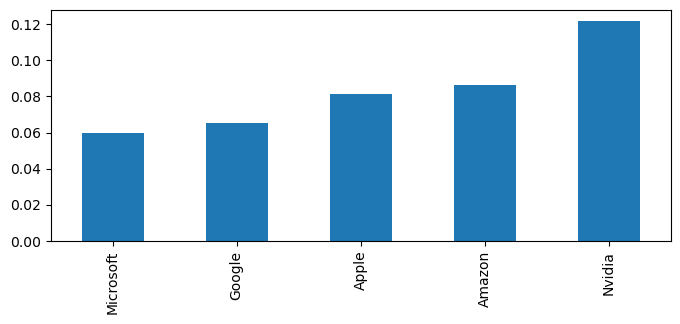

In [48]:
r.semideviation3(rt).sort_values().plot.bar(figsize=(8, 3))

<AxesSubplot:title={'center':'VaR Comparison'}>

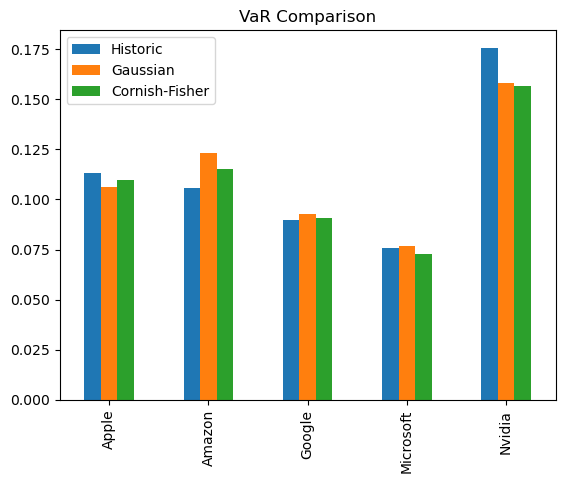

In [51]:
var_comparison.plot.bar(title="VaR Comparison")

In [53]:
r.cvar_historic(rt)

Apple        0.131789
Amazon       0.148222
Google       0.121050
Microsoft    0.095603
Nvidia       0.230370
dtype: float64

In [54]:
cov=rt.cov()

<AxesSubplot:xlabel='Volatility'>

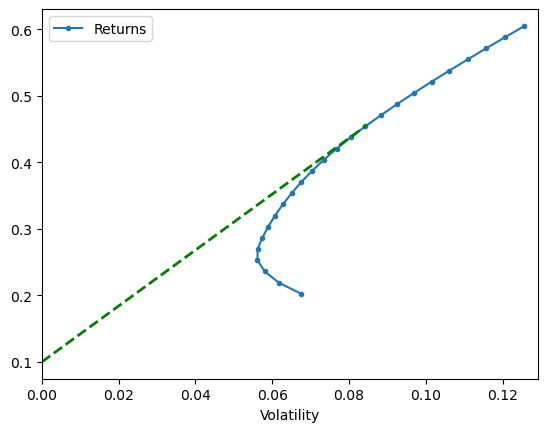

In [57]:
r.plot_ef(er,cov,25,show_cml=True,risk_free=0.1)